In [42]:
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
df_kulutus = pd.read_csv("../Data/Kulutusennuste_Tammikuu_2021.csv")
df_tuotanto = pd.read_csv("../Data/Sahkontuotantoennuste_Tammikuu_2021.csv")

In [44]:
def ChargingTime(interval, time, arr):
    # Käydään läpi ennustearvot ja lasketaan 'time' pituinen liukuva keskiarvo
    # Keskiarvot taulukkoon jossa sarakkeet 'aloitusaika', 'lopetusaika' ja 'keskiarvo'
    # Keskiarvoista valitaan pienin
    # Return pienimmän keskiarvon aloitusaika
    avgs = []

    # Calculates averages
    for i in range(len(arr) - time + 1):
        t1 = arr[i][0]
        t2 = arr[i][1]

        # Check if time difference is bigger than interval
        if (pd.Timedelta(t2-t1).seconds / 60.0) > interval:
            break
        else:
            window = arr[i : i + time]
            sum = 0
            for j in window:
                sum = sum + j[2]

            window_avg = round(sum / time, 3)
            
            if (len(arr) - 1) > i + time:
                avgs.append([arr[i][0], arr[i + time][1], window_avg])

    # Find min average and select the starting time to achieve that
    min_avg = [float('inf'), "", ""]
    for k in avgs:
    
        if min_avg[0] > k[2]:
            min_avg[0] = k[2]
            min_avg[1] = k[0]
            min_avg[2] = k[1]

    return min_avg

In [61]:
# Muutetaan arvot datetime:ksi
df_kulutus["Alkuaika UTC+02:00"] = pd.to_datetime(df_kulutus["Alkuaika UTC+02:00"])
df_kulutus["Lopetusaika UTC+02:00"] = pd.to_datetime(df_kulutus["Lopetusaika UTC+02:00"])

# Nimetään aikaväli
start_date = pd.to_datetime("2021-01-10 01:00:00")
end_date = pd.to_datetime("2021-01-20 23:00:00")

# Rajataan aikavälin mukaan
df_kulutus_filt = df_kulutus[(df_kulutus['Alkuaika UTC+02:00'] > start_date) & (df_kulutus['Lopetusaika UTC+02:00'] <= end_date)]

# Valitaan vain kolme saraketta
df_kulutus_filt = df_kulutus_filt[['Alkuaika UTC+02:00', 'Lopetusaika UTC+02:00', 'Kulutusennuste - seuraava vuorokausi']]
data = df_kulutus_filt.values.tolist()

In [63]:
output = ChargingTime(120, 5, data)

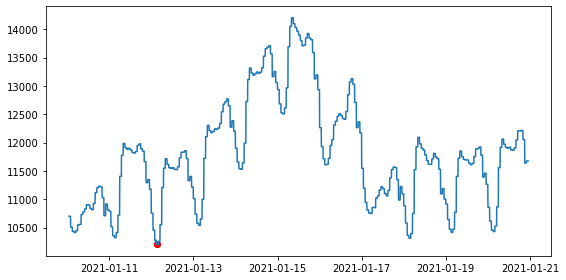

In [64]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

plt.plot(df_kulutus_filt["Alkuaika UTC+02:00"], df_kulutus_filt["Kulutusennuste - seuraava vuorokausi"])
plt.scatter(output[1], output[0], c="red")
plt.scatter(output[2], output[0], c="red")
plt.show()